### Spatial Analysis of Coast Live Oak Presence in Los Angeles County
*Ethan Trinh*

With the tools that were provided by this week's lab, it is now possible for me to improve upon the first few maps that I created for this class, which analyzed the presence of parrot observations in LA County. This time, I should be able to create a similar map with coast live oak observations (*Quercus agrifolia*), but in a more visually pleasing and easier to understand format, such as showing number of trees inside each census tract as opposed to just a simple geolocated marker of an observation.

In [36]:
# import necessary libraries for geospatial analysis
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

In [37]:
# import the data from the data file
clo = pd.read_csv('../Group Data/coastliveoaksobservations.csv')
# get a sample of the first five rows of the data file
clo.head(5)

,observed_on,updated_at,num_identification_agreements,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,scientific_name,common_name
0,1/29/2012,2021-01-20 01:40:48 UTC,1,"34.03779220581055, -118.750244140625",34.037792,-118.750244,5.0,5.0,Quercus agrifolia,coast live oak
1,3/6/2012,2015-07-01 01:06:17 UTC,3,Central Hahamongna Park,34.193470,-118.175340,NaN,NaN,Quercus agrifolia,coast live oak
2,3/22/2012,2015-07-01 01:16:52 UTC,3,Eaton Canyon,34.193066,-118.104315,NaN,NaN,Quercus agrifolia,coast live oak
3,6/15/2012,2021-01-20 01:40:40 UTC,1,Santa Monica Mountains,34.060028,-118.932694,55.0,55.0,Quercus agrifolia,coast live oak
4,7/4/2012,2016-05-17 20:01:59 UTC,2,Eaton Canyon park,34.184842,-118.095442,811.0,811.0,Quercus agrifolia,coast live oak


**Plotting the Data**

Now that the data has been correctly imported into the notebook, we can begin the process of spatially plotting the data. In order to achive this, however, we will need to convert the data into a geo data frame by combining the latitude and longitude into a singular data column.

Once that is done we can plot each observation as a point on an x and y axis, providing us a plot of where each tree is in LA County; this is similar in effect to the parrot observation maps I completed in the first assignment.

In [38]:
# convert clo to a geo data frame
geoclo = gpd.GeoDataFrame(clo, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(clo.longitude, clo.latitude))

Text(0.5, 1.0, 'Coast Live Oak Observations in LA County')

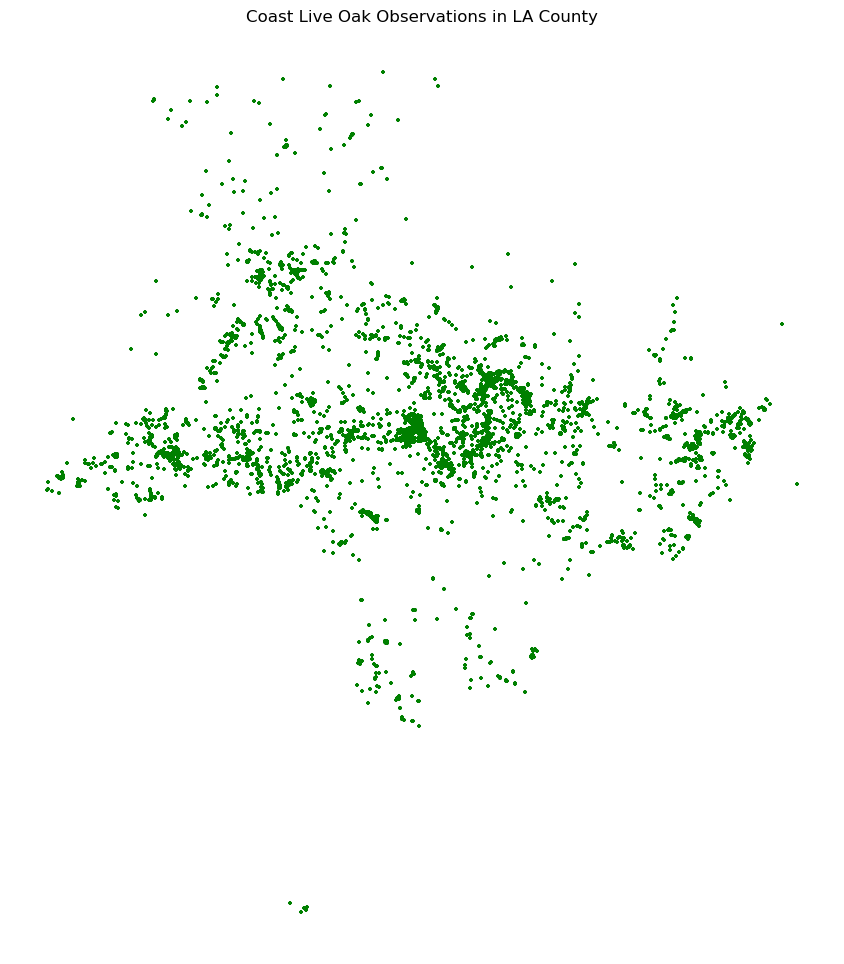

In [19]:
# create a plot of observations
fig, ax = plt.subplots(figsize=(12,12))
geoclo.plot(ax=ax, 
        marker='+',
        markersize=10,
        color='green')
ax.axis('off')
ax.set_title('Coast Live Oak Observations in LA County')

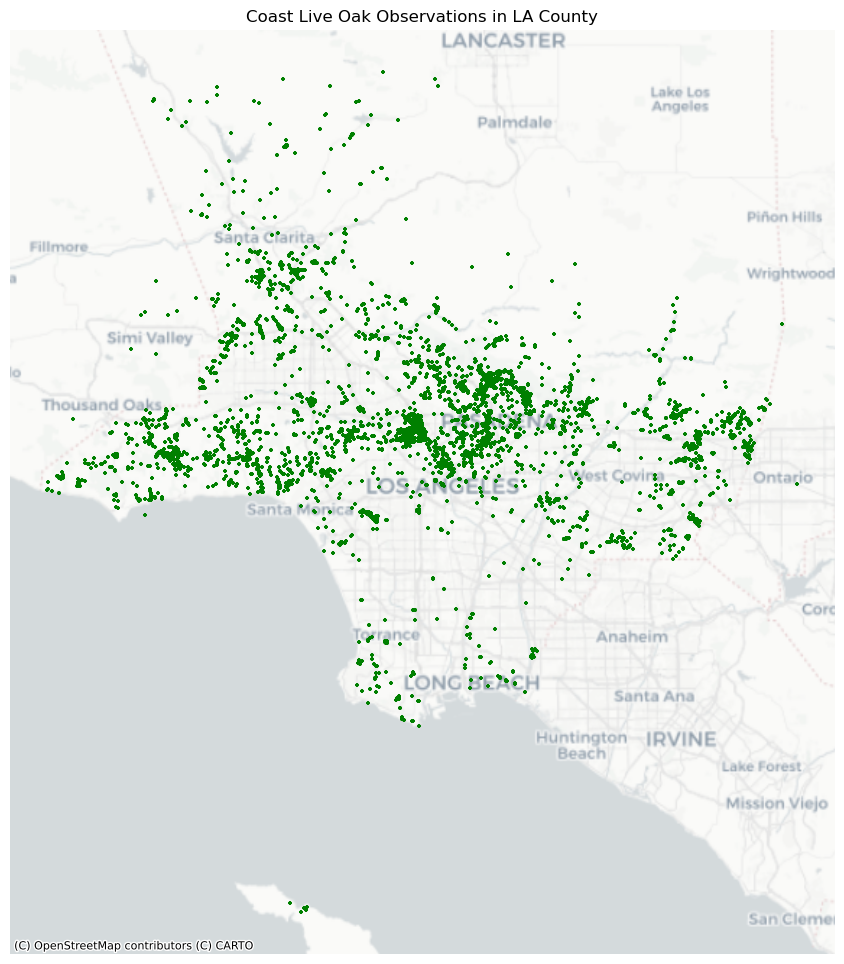

In [22]:
# create a plot with an added basemap to give the plot geographic context
fig, ax = plt.subplots(figsize=(12,12))
geoclo.plot(ax=ax, 
        marker='+',
        markersize=10,
        color='green')
ax.axis('off')
ax.set_title('Coast Live Oak Observations in LA County')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326) # note that we must specify the projection here (crs)

Given the recent wildfires in Eaton Canyon/Altadena and Pacific Palisades, we may want to look at specific areas on a smaller scale to determine the presence of coast live oaks in those regions and perhaps how effective either a greater or lesser presence would have been.

We can utilize the place_guess column in our data file as a way to only find points in a certain area.

In [34]:
# create a list of all of the unique values located in the place_guess column of our csv file
unique_places = geoclo['place_guess'].unique()
print(unique_places)

['34.03779220581055, -118.750244140625' 'Central Hahamongna Park'
 'Eaton Canyon' ... 'Preston Ave, Los Angeles, CA, US'
 'Virazon Dr, La Habra Heights, CA, US' 'Agoura Hills, CA 91301, USA']


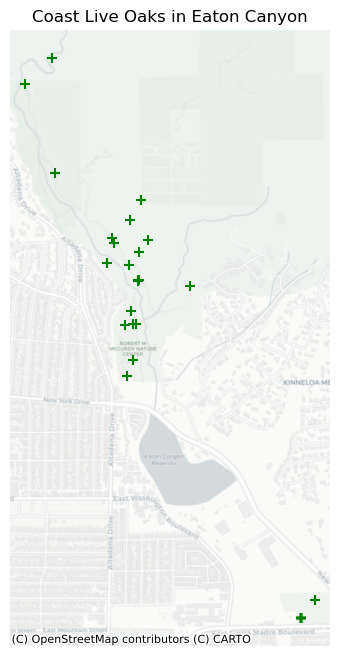

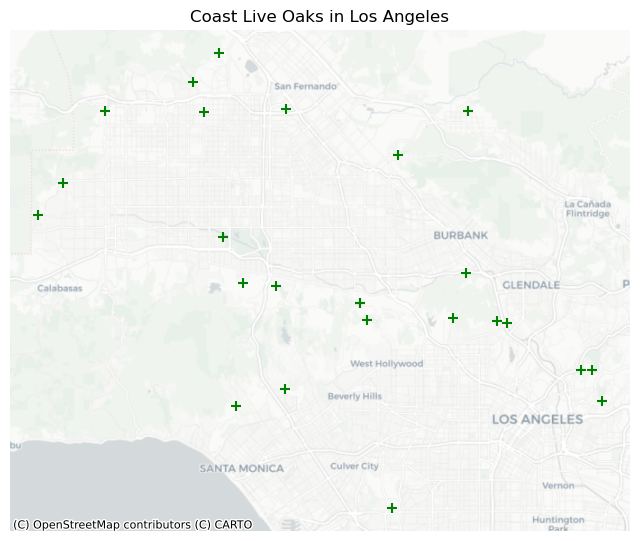

In [35]:
# create a variable that contains places we want to take a closer look at
places = ['Eaton Canyon', 'Los Angeles']
# create a forloop that will map each place in the places list that was just created
for place in places:
    fig, ax = plt.subplots(figsize=(8,8))
    geoclo[geoclo.place_guess == place].plot(ax=ax, 
                          marker='+',
                          markersize=50,
                          color='green')
    ax.axis('off')
    ax.set_title('Coast Live Oaks in '+str(place))

# add a base map
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

The resulting maps are certainly easier to read than the map of overall observations in Los Angeles, which contains over 10,000 values and thus makes it hard to pinpoint individual observations. However, as can be seen through the creation the unique_places list, the place_guess column of our data is porbably not the best one to be using, as what users fill in varies drastically from simple city names to neighborhoods to coordinates to full addresses. In the future, we may want to redownload data from iNaturalist that contains the city or zip code column so that we can sort by a more standardized value instead.

**Creating More Complex Maps**

With the basic plotted maps now produced, we can move on to more complex versions, such as creating one through plotly that is interactive with highlightable points that display coordinates when hovered over or a spatial display by Los Angeles neighborhood.

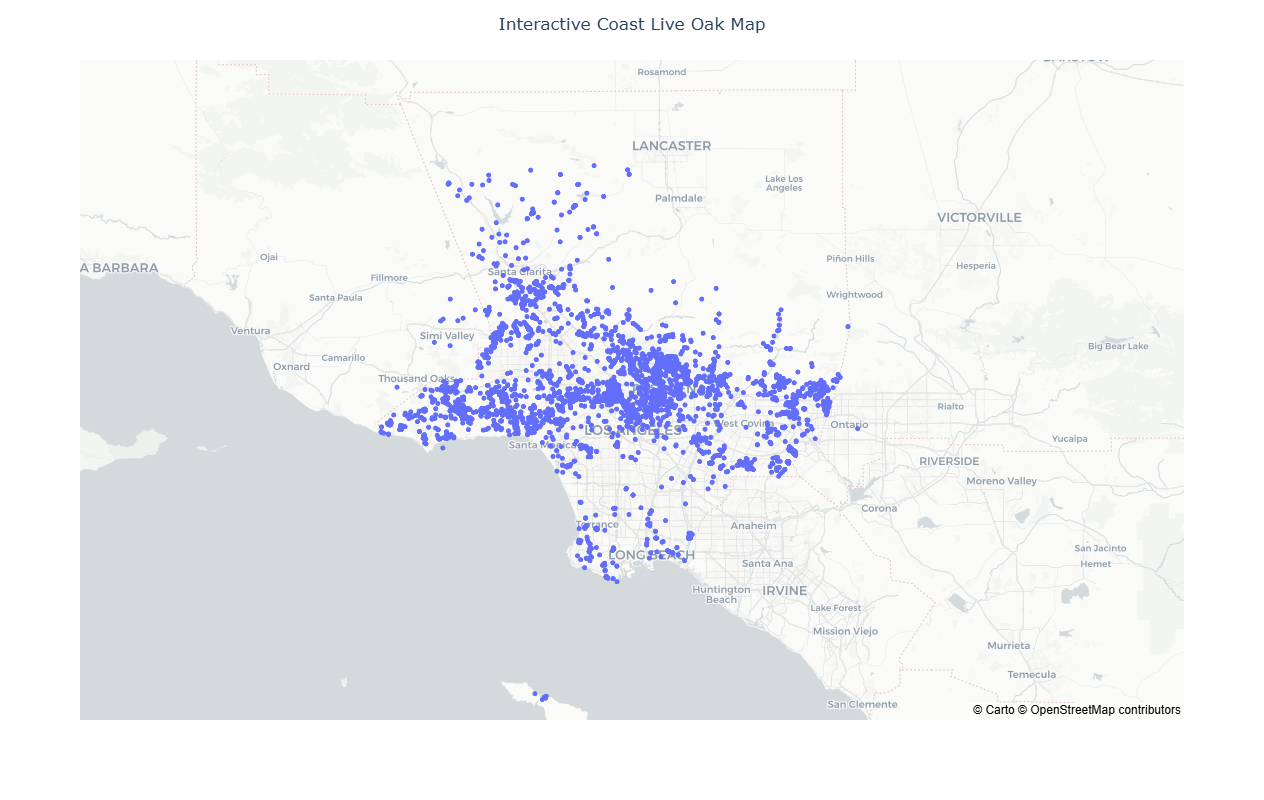

In [45]:
# create an interactive plot of oak locations
oakpl = px.scatter_mapbox(clo,
                        lat='latitude',
                        lon='longitude',
                        mapbox_style="carto-positron")
oakpl.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Coast Live Oak Map",
    title_x=0.5
)
# display the plot
oakpl.show()

<Axes: >

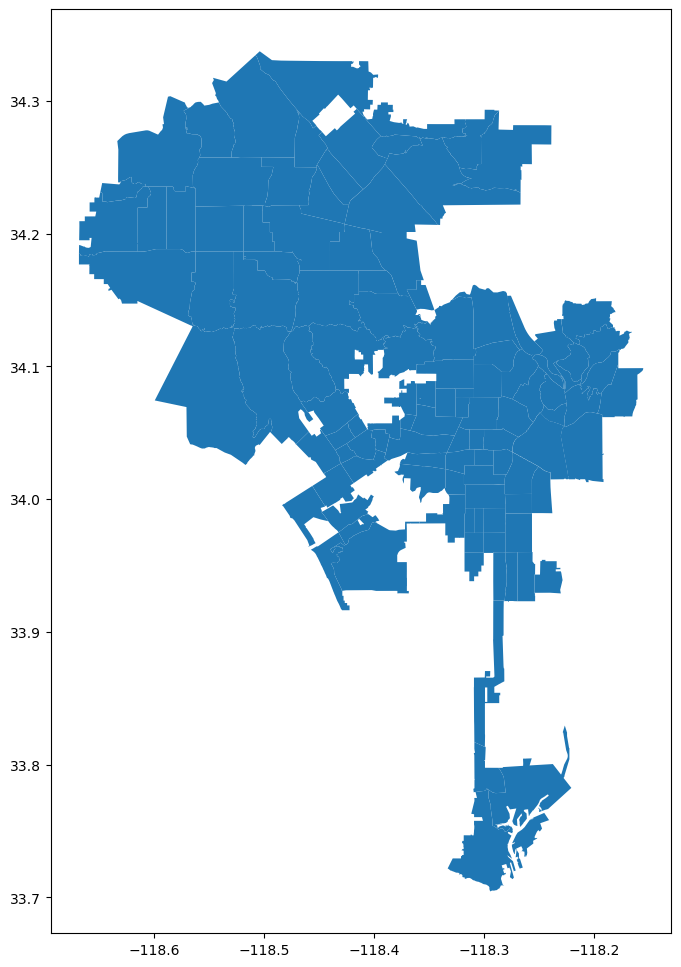

In [50]:
# import a file containing spatial data of LA neighborhoods
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
# show a map of the neighborhoods
neighborhoods.plot(figsize=(12,12))

In [51]:
# create a spatial join of the imported neighborhood polygons with the geolocated tree observations
oak_by_neighborhood = gpd.sjoin(neighborhoods, geoclo) 
oak_by_neighborhood

,OBJECTID,name,geometry,index_right,observed_on,updated_at,num_identification_agreements,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,scientific_name,common_name
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.4424 34.26...",5291,3/17/2022,2024-01-01 20:47:26 UTC,1,"Arleta High School, Los Angeles, CA, US",34.250412,-118.442134,39.0,39.0,Quercus agrifolia,coast live oak
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",4775,9/19/2021,2021-09-19 21:18:48 UTC,0,Los Angeles,34.120293,-118.268547,29.0,29.0,Quercus agrifolia,coast live oak
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",3220,8/23/2019,2019-08-23 14:46:13 UTC,0,"Legion Ln, Los Angeles, CA, US",34.121105,-118.269313,48.0,48.0,Quercus agrifolia,coast live oak
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",888,8/20/2017,2018-01-14 00:06:22 UTC,1,"3401 Dover Street Los Angeles, CA 90039 USA",34.121181,-118.269386,NaN,NaN,Quercus agrifolia,coast live oak
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",3777,4/8/2020,2020-04-09 01:18:08 UTC,0,"Atwater Village, Los Angeles, CA, USA",34.109510,-118.258309,NaN,NaN,Quercus agrifolia,coast live oak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,Woodland Hills,"POLYGON ((-118.5724 34.18668, -118.57161 34.18...",7858,4/18/2024,2024-04-22 20:14:39 UTC,0,"Macfarlane Dr, Los Angeles, CA, US",34.162934,-118.614858,2809.0,2809.0,Quercus agrifolia,coast live oak
112,113,Woodland Hills,"POLYGON ((-118.5724 34.18668, -118.57161 34.18...",6847,4/30/2023,2023-05-28 17:04:10 UTC,2,"Los Angeles County, US-CA, US",34.163079,-118.596202,9.0,9.0,Quercus agrifolia,coast live oak
112,113,Woodland Hills,"POLYGON ((-118.5724 34.18668, -118.57161 34.18...",2739,4/7/2019,2021-01-19 23:38:00 UTC,1,"24418 Torch St, Los Angeles, CA, US",34.175839,-118.657207,50.0,50.0,Quercus agrifolia,coast live oak
113,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",6745,4/8/2023,2023-05-23 17:38:39 UTC,1,"Victory Blvd, Los Angeles, CA, US",34.186653,-118.493278,47.0,47.0,Quercus agrifolia,coast live oak


In [54]:
# create a count of the number of oaks found in each neighborhood
oak_counts = oak_by_neighborhood.value_counts('name').reset_index(name='oak_count')
# add the newly created count into the neighborhood table
neighborhoods = neighborhoods.merge(oak_counts, how='left',on='name')
# get a sample of the data to ensure efficacy
neighborhoods.sample(5)

,OBJECTID,name,geometry,oak_count_x,oak_count_y,oak_count
94,95,Valley Glen,"POLYGON ((-118.4138 34.20458, -118.40944 34.20...",27.0,27.0,27.0
47,48,Hollywood Hills,"POLYGON ((-118.31783 34.15212, -118.31663 34.1...",67.0,67.0,67.0
17,18,Chatsworth Reservoir,"POLYGON ((-118.6202 34.23883, -118.61971 34.23...",10.0,10.0,10.0
49,50,Hollywood,"POLYGON ((-118.32802 34.10545, -118.32688 34.1...",1.0,1.0,1.0
40,41,Hansen Dam,"POLYGON ((-118.36203 34.27323, -118.36106 34.2...",20.0,20.0,20.0


<Axes: >

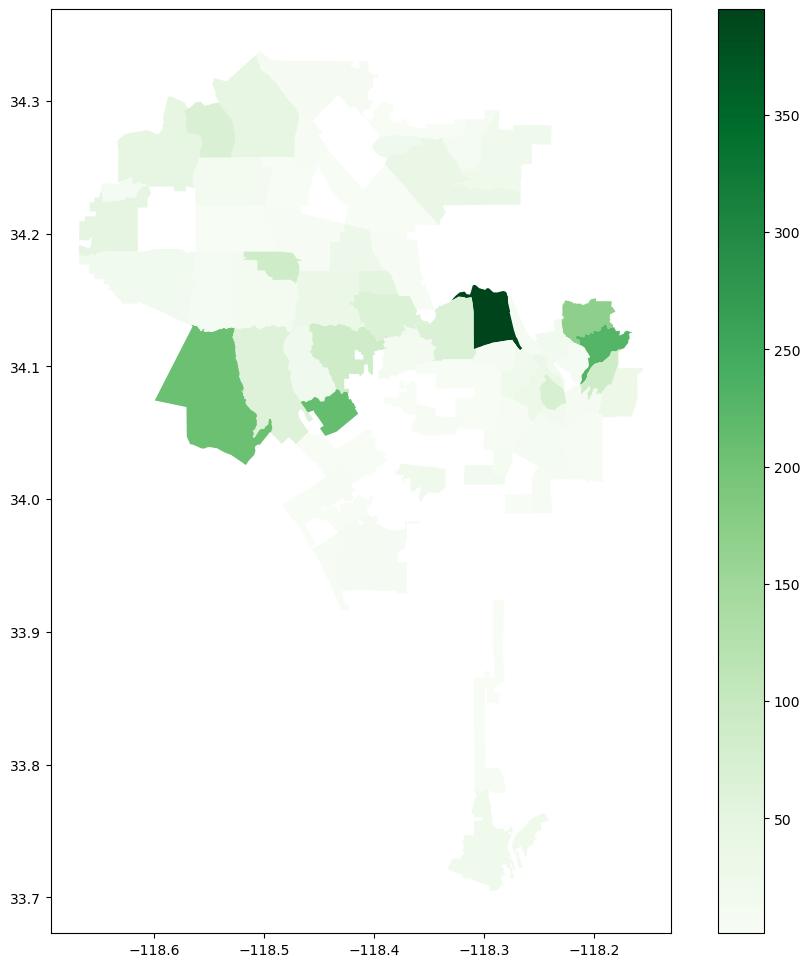

In [56]:
# create a chloropleth map of trees by neighborhood in the City of LA
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='oak_count',legend=True,cmap='Greens')

As can be seen above the more complex maps were successfully created! However, the chloropleth map is missing data from the rest of Los Angeles County since polygons for the City of Los Angeles was used instead of the county. Before the midterm, it would be good to repeat this process but using the polygons provided by the census tract data from the County of LA or perhaps city boundaries.